In [48]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

This dataset is classification-based dataset which classifies beans into different types of beans. Features have been taken of the beans to classify them into their category.

In [49]:
dtf = pd.read_csv('Dry_Bean_Dataset.csv')
dtf.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,EquivDiameter,Solidity,roundness,ShapeFactor1,ShapeFactor2,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,190.141097,0.988856,0.958027,0.007332,0.003147,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,191.272751,0.984986,0.887034,0.006979,0.003564,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,193.410904,0.989559,0.947849,0.007244,0.003048,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,195.467062,0.976696,0.903936,0.007017,0.003215,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,195.896503,0.990893,0.984877,0.006697,0.003665,SEKER


#Analysing the number of rows and number of columns in dataset


In [50]:
print(dtf.shape)

(13611, 12)


In [51]:
def utils_recognize_type(dtf, col, max_cat=20):
    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

#Plotting the datatypes of each column

In [52]:
dic_cols = {col:utils_recognize_type(dtf, col, max_cat=20) for col in dtf.columns}
print(dic_cols)

{'Area': 'num', 'Perimeter': 'num', 'MajorAxisLength': 'num', 'MinorAxisLength': 'num', 'AspectRation': 'num', 'Eccentricity': 'num', 'EquivDiameter': 'num', 'Solidity': 'num', 'roundness': 'num', 'ShapeFactor1': 'num', 'ShapeFactor2': 'num', 'Class': 'cat'}


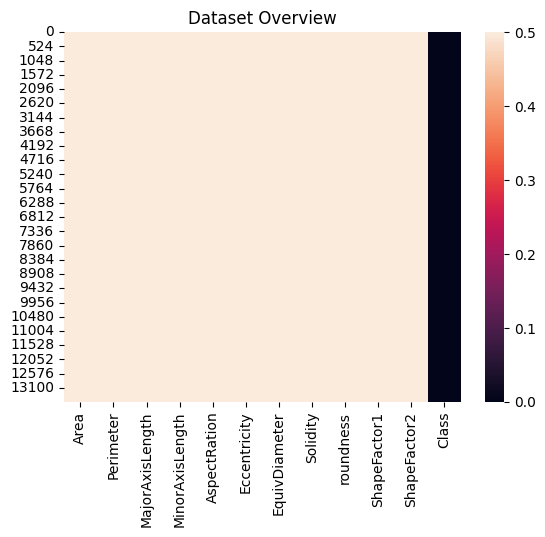

In [66]:
heatmap = dtf.isnull()
for k,v in dic_cols.items():
 if v == "num":
   heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
 else:
   heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
sns.heatmap(heatmap).set_title('Dataset Overview')
plt.show()


#Depicting the percentage of every class present in our dataset

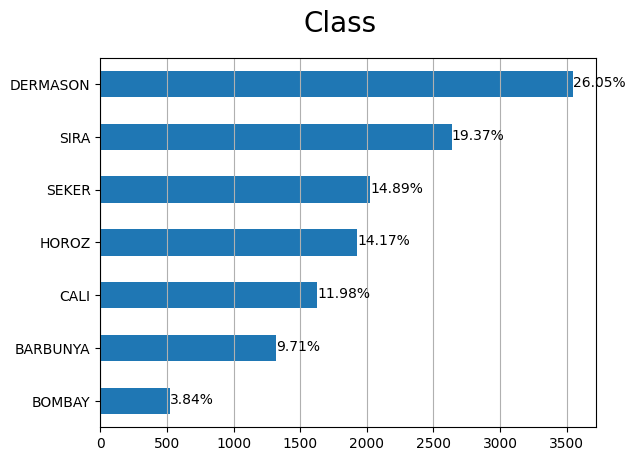

In [ ]:
y = "Class"
ax = dtf[y].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(y, fontsize=20)
plt.show()

We can see that '**DERMASON**' is present with the highest percentage(26.05%)

In [ ]:
mean1=dtf.groupby('Class', as_index=False)['ShapeFactor1','ShapeFactor2'].mean()
mean1

<ipython-input-19-a48c2521f202>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean1=dtf.groupby('Class', as_index=False)['ShapeFactor1','ShapeFactor2'].mean()


,Class,ShapeFactor1,ShapeFactor2
0,BARBUNYA,0.005357,0.001394
1,BOMBAY,0.003442,0.000844
2,CALI,0.005459,0.001107
3,DERMASON,0.007755,0.002161
4,HOROZ,0.007007,0.001048
5,SEKER,0.006334,0.002541
6,SIRA,0.006720,0.001683


#The mean of the two columns(ShapeFactor1 and ShapeFactor2) is plotted for every class.

<Axes: xlabel='Class'>

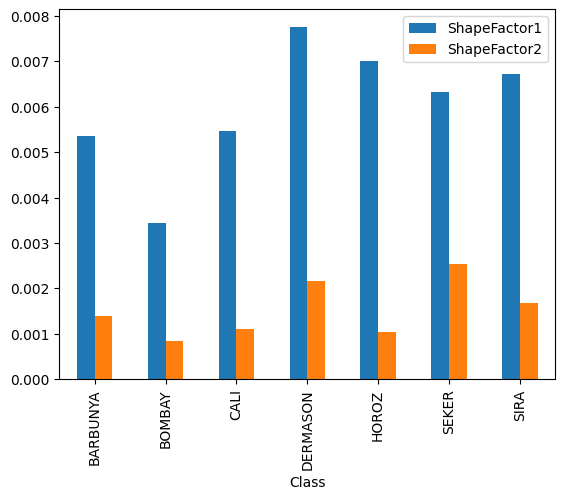

In [ ]:
mean1.plot(x="Class", y=["ShapeFactor1", "ShapeFactor2"], kind="bar")

      Class           Area
0  BARBUNYA   69804.133132
1    BOMBAY  173485.059387
2      CALI   75538.211043
3  DERMASON   32118.710942
4     HOROZ   53648.508817
5     SEKER   39881.299951
6      SIRA   44729.128604


<Axes: xlabel='Class'>

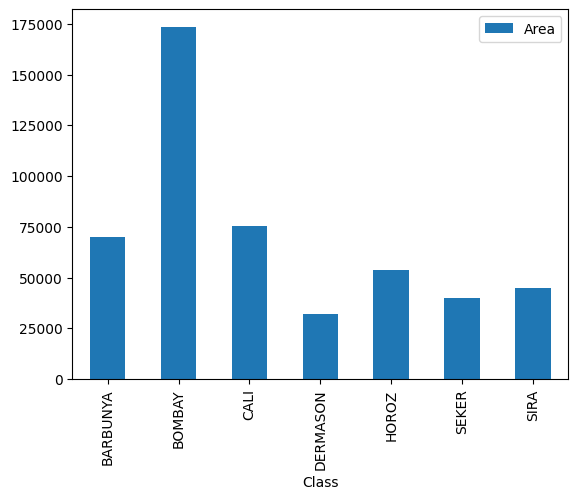

In [ ]:
mean2=dtf.groupby('Class', as_index=False)['Area'].mean()
print(mean2)
mean2.plot(x="Class",y="Area",kind='bar')

      Class  roundness
0  BARBUNYA   0.800200
1    BOMBAY   0.864421
2      CALI   0.845934
3  DERMASON   0.908114
4     HOROZ   0.794420
5     SEKER   0.944508
6      SIRA   0.884652


<Axes: xlabel='Class'>

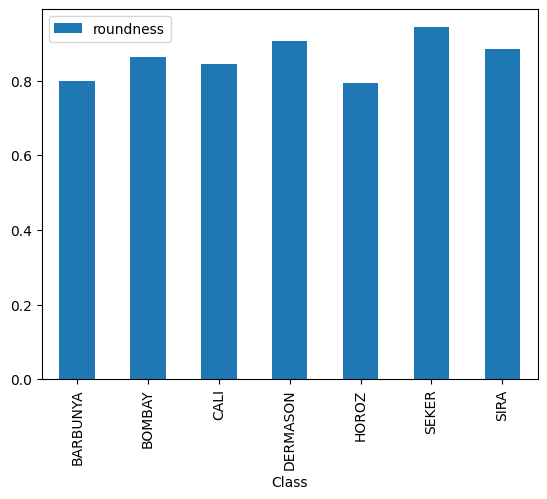

In [ ]:
mean3=dtf.groupby('Class', as_index=False)['roundness'].mean()
print(mean3)
mean3.plot(x="Class",y="roundness",kind='bar')

We can see that their is not much difference between the average of roundness of each class. Roundess cannot be a good estimator of category of beans


#CORRELATION

Text(0.5, 1.0, 'pearson correlation')

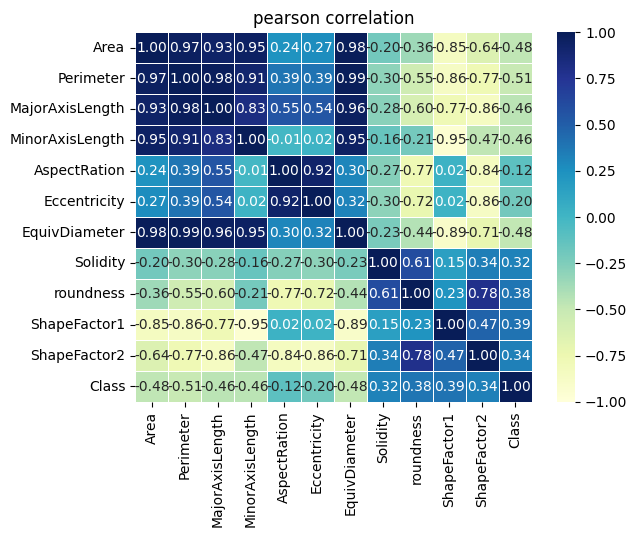

In [ ]:
corr_matrix = dtf.copy()
for col in corr_matrix.columns:
    if corr_matrix[col].dtype == "O":
         corr_matrix[col] = corr_matrix[col].factorize(sort=True)[0]
corr_matrix = corr_matrix.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.6)
plt.title("pearson correlation")

We can remove some features which are highly correlated. For example here : EquivDiameter and MajorAxisLength are correlated high enough. We can keep the most useful feature.